# Data exploration with churn example Part 1

### Import required modules 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline


## Some common tasks in data exploration

+ Load data
+ Variable Identification
+ Univariate Analysis
+ Bi-variate Analysis
+ Missing values treatment


## 1. Load data file into pandas Data Frame.

Please download the data file (churn_train_complete.csv) from canvas into your local drive.

In [2]:
churn=pd.read_csv('C:\\Users\\a02262028\\Documents\\data\\churn\\churn_train_complete.csv')

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992931 entries, 0 to 992930
Data columns (total 24 columns):
msno                      992931 non-null object
is_churn                  992931 non-null int64
logs_count                869926 non-null float64
city                      876143 non-null float64
bd                        876143 non-null float64
gender                    396057 non-null float64
registered_via            876143 non-null float64
registration_init_time    876143 non-null float64
trans_count               990834 non-null float64
payment_method_id         990834 non-null float64
payment_plan_days         990834 non-null float64
plan_list_price           990834 non-null float64
actual_amount_paid        990834 non-null float64
is_auto_renew             990834 non-null float64
is_cancel                 990834 non-null float64
cancel_count              990834 non-null float64
date                      869926 non-null float64
num_25                    869926 non-null 

### Check the shape of the data

In [4]:
churn.shape

(992931, 24)

### Preview the first five row of the origninal dataset 

In [5]:
pd.set_option('display.max_columns',None)# Display all columns, be coutious, if large number of columns, do not use.

churn.head()

,msno,is_churn,logs_count,city,bd,gender,registered_via,registration_init_time,trans_count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,cancel_count,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,26.0,18.0,36.0,2.0,9.0,20050406.0,2.0,38.0,30.0,149.0,149.0,0.0,0.0,0.0,20170208.0,1.0,0.0,0.0,0.0,1.0,2.0,311.402
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,521.0,10.0,38.0,1.0,9.0,20050407.0,22.0,39.0,30.0,149.0,149.0,1.0,0.0,1.0,20170215.0,0.0,0.0,0.0,0.0,3.0,3.0,796.916
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,237.0,11.0,27.0,2.0,9.0,20051016.0,10.0,39.0,30.0,149.0,149.0,1.0,1.0,1.0,20170131.0,2.0,0.0,0.0,1.0,1.0,4.0,451.186
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,735.0,13.0,23.0,2.0,9.0,20051102.0,2.0,38.0,410.0,1788.0,1788.0,0.0,0.0,0.0,20170221.0,13.0,2.0,2.0,4.0,17.0,35.0,5194.345
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,758.0,3.0,27.0,1.0,9.0,20051228.0,8.0,38.0,30.0,149.0,149.0,0.0,0.0,0.0,20170228.0,0.0,0.0,0.0,1.0,2.0,3.0,751.381


### List columns of the dataset 

Use dataframe.columns

In [6]:
churn.columns

Index(['msno', 'is_churn', 'logs_count', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'trans_count',
       'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'is_cancel', 'cancel_count',
       'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs'],
      dtype='object')

## 2. Variable Identification

+ Type of Variables
 + Lable (target variables) 
 + Features (predictor variables)
 + Identification - unique?
+ Data Types
 + Character
 + Numerical
+ Categorical or continous
 + Categorical
 + Continous


### Discription of the data

The dataset contains about 1 million subscribers to an online music provider.

For a subscription business, accurately predicting churn (**when a subscriber discontinue a service**) is critical to long-term success. Even slight variations in churn can drastically affect profits.

The goal of the task is to predict who will churn.

A brief description of the data columns:
+ 'msno': the unique identification of a subscriber
+ 'is_churn': the label or the target, indicating whether a subscriber has churned,is_churn = 1 means churn,is_churn = 0 means renewal.
+ 'logs_count': number of logs for listening behaviors of a subscriber
+ 'city': the city of a subscriber choose when registrated
+ 'bd': age
+ 'gender': gender
+ 'registered_via': registration method
+ 'registration_init_time': registration date
+ 'trans_count': number of transactions a subscriber completed
+ 'payment_method_id': payment_method
+ 'payment_plan_days': days in a payment_plan
+ 'plan_list_price': price
+ 'actual_amount_paid': actual_amount_paid
+ 'is_auto_renew': whether the plan is auto renewed
+ 'is_cancel': whether or not the user canceled the membership in this transaction.
+ 'cancel_count': how many times the user has cancelled the service in the past.
+ 'date': last recorded log date
+ 'num_25': # of songs played less than 25% of the song length in the last activity
+ 'num_50': # of songs played between 25% to 50% of the song length  in the last activity
+ 'num_75': # of songs played between 50% to 75% of of the song length in the last activity
+ 'num_985': # of songs played between 75% to 98.5% of the song length in the last activity
+ 'num_100': # of songs played over 98.5% of the song length in the last activity
+ 'num_unq': # of unique songs played in the last activity
+ 'total_secs': total seconds played in the last activity

### Label vs. Features (target vs. predictors)

+ Lable y (target): 'is_churn'
+ Unique id: 'msno'
+ Features X (predictors): rest of variables

### Categorical or Continous

#### Categorical:
+ 'is_churn'
+ 


#### Continuous:
+ 'logs_count'
+ 


In [7]:
categorical_col=['city','gender','registered_via','payment_method_id', 'is_auto_renew','is_cancel']
continous_col=['logs_count','bd','trans_count','plan_list_price','actual_amount_paid','cancel_count','num_25',
               'num_50','num_75','num_985', 'num_100', 'num_unq','total_secs']

### Display data types

In [8]:
churn.dtypes #Display data types for all columns

msno                       object
is_churn                    int64
logs_count                float64
city                      float64
bd                        float64
gender                    float64
registered_via            float64
registration_init_time    float64
trans_count               float64
payment_method_id         float64
payment_plan_days         float64
plan_list_price           float64
actual_amount_paid        float64
is_auto_renew             float64
is_cancel                 float64
cancel_count              float64
date                      float64
num_25                    float64
num_50                    float64
num_75                    float64
num_985                   float64
num_100                   float64
num_unq                   float64
total_secs                float64
dtype: object

In [9]:
churn['city'].dtypes #Display data types for one column

dtype('float64')

### Change data types

+ Change the data types before read_csv
+ Change the data dtypes after read_csv

#### Change the data types before read_csv

Let's open the csv file with notepad to inspect the data first.

In [10]:
churn2=pd.read_csv('C:\\Users\\a02262028\\Documents\\data\\churn\\churn_train_complete.csv',
                   parse_dates=['registration_init_time','date'],#specify columns to be parsed
                   infer_datetime_format =True,
                  )

In [11]:
churn2.dtypes

msno                       object
is_churn                    int64
logs_count                float64
city                      float64
bd                        float64
gender                    float64
registered_via            float64
registration_init_time     object
trans_count               float64
payment_method_id         float64
payment_plan_days         float64
plan_list_price           float64
actual_amount_paid        float64
is_auto_renew             float64
is_cancel                 float64
cancel_count              float64
date                       object
num_25                    float64
num_50                    float64
num_75                    float64
num_985                   float64
num_100                   float64
num_unq                   float64
total_secs                float64
dtype: object

In [12]:
churn2.date[:5]

0    20170208.0
1    20170215.0
2    20170131.0
3    20170221.0
4    20170228.0
Name: date, dtype: object

#### Use converters to process raw data

You can specify converts in pd.read_csv() to preprocess the raw data

In [13]:
from datetime import datetime
def get_date(s):
    if s!='':
        t=datetime.strptime(s,'%Y%m%d.0')
    else:
        t='NaN'
    return t    

In [14]:
get_date('')

'NaN'

In [15]:
churn2=pd.read_csv('C:\\Users\\a02262028\\Documents\\data\\churn\\churn_train_complete.csv',
                   #parse_dates=['registration_init_time','date'],#specify columns to be parsed
                   #infer_datetime_format =True,
                   converters={'registration_init_time':get_date,'date':get_date}#specify functions to parse columns
                  )

In [16]:
churn2.dtypes

msno                              object
is_churn                           int64
logs_count                       float64
city                             float64
bd                               float64
gender                           float64
registered_via                   float64
registration_init_time    datetime64[ns]
trans_count                      float64
payment_method_id                float64
payment_plan_days                float64
plan_list_price                  float64
actual_amount_paid               float64
is_auto_renew                    float64
is_cancel                        float64
cancel_count                     float64
date                      datetime64[ns]
num_25                           float64
num_50                           float64
num_75                           float64
num_985                          float64
num_100                          float64
num_unq                          float64
total_secs                       float64
dtype: object

In [17]:
churn2.date[:5]

0   2017-02-08
1   2017-02-15
2   2017-01-31
3   2017-02-21
4   2017-02-28
Name: date, dtype: datetime64[ns]

### Once converted to datetime type, you can use it as datetime

To get year, month, day, week, weekday(Monday is 0 and Sunday is 6),difference between two dates, etc.

In [18]:
churn2.date.dt.year[:5]
churn2['date'].dt.year[:5]

0    2017.0
1    2017.0
2    2017.0
3    2017.0
4    2017.0
Name: date, dtype: float64

In [19]:
churn2.date.dt.month[:5]

0    2.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: date, dtype: float64

In [20]:
churn2.date.dt.day[:5]

0     8.0
1    15.0
2    31.0
3    21.0
4    28.0
Name: date, dtype: float64

In [21]:
churn2.date.dt.week[:5]

0    6.0
1    7.0
2    5.0
3    8.0
4    9.0
Name: date, dtype: float64

In [22]:
churn2.date.dt.weekday[:5]

0    2.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: date, dtype: float64

In [23]:
max(churn2.date)

Timestamp('2017-02-28 00:00:00')

In [24]:
min(churn2.date)

Timestamp('2015-01-01 00:00:00')

In [25]:
churn2.date[1]-churn2.date[0]

Timedelta('7 days 00:00:00')

In [26]:
(churn2.date[1]-churn2.date[0]).days

7

### Change the data dtypes after read_csv

Use .astype() to Cast a pandas object to a specified dtype 

Note, if there are missing values, it may raise exceptions.

In [27]:
churn['city']=churn['city'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [28]:
churn['city']=churn['city'].astype('int64',errors='ignore') #use errors='ignore' to return original values if errors.

In [29]:
churn['city'][:5]

0    18.0
1    10.0
2    11.0
3    13.0
4     3.0
Name: city, dtype: float64

#### You could fill in missing value and then use astype()

In [30]:
churn['city'].fillna(0,inplace=True)

In [31]:
churn['city']=churn['city'].astype('int64')

In [32]:
churn['city'][:5]

0    18
1    10
2    11
3    13
4     3
Name: city, dtype: int64

In [33]:
churn['city'].dtypes

dtype('int64')

#### Convert date column to datetime dtype

You can use `df.astype()`, or `pd.to_datetime()`, or `df.apply()`


In [34]:
churn['registration_init_time'].head()

0    20050406.0
1    20050407.0
2    20051016.0
3    20051102.0
4    20051228.0
Name: registration_init_time, dtype: float64

In [35]:
churn['registration_init_time2']=churn['registration_init_time'].astype(datetime)

In [36]:
churn['registration_init_time2'][:5]

0    2.00504e+07
1    2.00504e+07
2     2.0051e+07
3    2.00511e+07
4    2.00512e+07
Name: registration_init_time2, dtype: object

#### Use `pd.to_datetime`

In [37]:
churn['registration_init_time2']=pd.to_datetime(
    churn['registration_init_time'],
    infer_datetime_format=True,
    errors='coerce')# use errors='coerce' to supress errors

In [38]:
churn['registration_init_time2'][:5]

0   1970-01-01 00:00:00.020050406
1   1970-01-01 00:00:00.020050407
2   1970-01-01 00:00:00.020051016
3   1970-01-01 00:00:00.020051102
4   1970-01-01 00:00:00.020051228
Name: registration_init_time2, dtype: datetime64[ns]

#### It does not infer the format correctly

You can specify format of the date column, with format argument.

In [39]:
churn['registration_init_time']=pd.to_datetime(
    churn['registration_init_time'],
    infer_datetime_format=True,
    format='%Y%m%d.0',#specify format of the date column
    errors='coerce')# use errors='coerce' to supress errors, because it has missing values.

In [40]:
churn['registration_init_time'][:5]

0   2005-04-06
1   2005-04-07
2   2005-10-16
3   2005-11-02
4   2005-12-28
Name: registration_init_time, dtype: datetime64[ns]

### Use `df.apply()`

`df.apply(function)` will applies function along input axis of DataFrame
+ axis=0 or ‘index’: apply function to each column
+ axis=1 or ‘columns’: apply function to each row

In [41]:
churn['date'][:5]

0    20170208.0
1    20170215.0
2    20170131.0
3    20170221.0
4    20170228.0
Name: date, dtype: float64

In [42]:
str(np.nan)

'nan'

In [43]:
from datetime import datetime
def get_date2(s):
    s=str(s)
    if s!='nan':
        t=datetime.strptime(s,'%Y%m%d.0')
    else:
        t='NaN'
    return t    

In [44]:
churn['date']=churn['date'].apply(get_date2)

In [45]:
churn['date'][:5]

0   2017-02-08
1   2017-02-15
2   2017-01-31
3   2017-02-21
4   2017-02-28
Name: date, dtype: datetime64[ns]

### In class exercise, can you make a function which returns the log of total_secs? and then create a new column that is the log of total_sec

use `np.log()` for log function

`churn['log_sec']` for the new colunm.

In [46]:
churn['total_secs'][:5]

0     311.402
1     796.916
2     451.186
3    5194.345
4     751.381
Name: total_secs, dtype: float64

In [47]:
np.log(311.402)

5.7410846819868517

In [48]:
churn['log_sec'] =np.log(churn['total_secs'])

In [49]:
np.log(np.nan)

nan

In [50]:
churn['log_sec'][:5]

0    5.741085
1    6.680749
2    6.111880
3    8.555326
4    6.621913
Name: log_sec, dtype: float64

## 3. Univariate Analysis

### Checking number of missing values for each column

Use dataframe.isnull().sum()

In [51]:
churn.isnull().sum()

msno                            0
is_churn                        0
logs_count                 123005
city                            0
bd                         116788
gender                     596874
registered_via             116788
registration_init_time     116788
trans_count                  2097
payment_method_id            2097
payment_plan_days            2097
plan_list_price              2097
actual_amount_paid           2097
is_auto_renew                2097
is_cancel                    2097
cancel_count                 2097
date                       123005
num_25                     123005
num_50                     123005
num_75                     123005
num_985                    123005
num_100                    123005
num_unq                    123005
total_secs                 123005
registration_init_time2    116788
log_sec                    123005
dtype: int64

### For the time being, we just fill all missing values into 0 for visualizations

In [52]:
churn3=churn.copy() #copy the data, avoid make changes on original data

In [53]:
churn3=churn3.fillna(0)

### Examing the continous numerical data

Get basic statistics of variables, using dataframe.describe()

For continous data, we typically inspect the descriptive statistics of them.

In [54]:
n_col=['logs_count',  'bd', 'trans_count',
       'payment_plan_days', 'plan_list_price',
       'actual_amount_paid',   'cancel_count',
        'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs']# numerical columns
c_col=['city','gender','registered_via','payment_method_id', 'is_auto_renew','is_cancel'] #categorical columns



In [55]:
churn3[n_col].describe()

,logs_count,bd,trans_count,payment_plan_days,plan_list_price,actual_amount_paid,cancel_count,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
count,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,9.929310e+05
mean,247.294925,11.965041,15.137727,34.676029,149.334719,148.965537,0.247658,4.383195,1.075078,0.656158,0.732864,19.196714,19.409865,5.047564e+03
std,229.442411,19.428718,8.213191,36.931546,159.664974,159.842082,0.550285,10.788579,3.150343,1.600336,2.179384,34.620423,26.741491,8.343023e+03
min,0.000000,-3152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,37.000000,0.000000,8.000000,30.000000,99.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.919630e+02
50%,185.000000,0.000000,16.000000,30.000000,149.000000,149.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,2.283329e+03
75%,417.000000,26.000000,22.000000,30.000000,149.000000,149.000000,0.000000,4.000000,1.000000,1.000000,1.000000,23.000000,25.000000,6.257627e+03
max,790.000000,2015.000000,71.000000,450.000000,2000.000000,2000.000000,20.000000,1153.000000,435.000000,216.000000,693.000000,11170.000000,1131.000000,2.372163e+06


### Visualization makes interpretation easilier

### Histograms

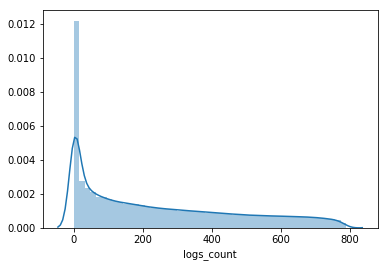

In [56]:
sns.distplot(churn3.logs_count)

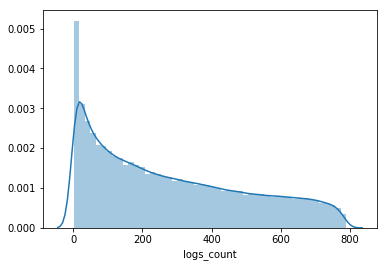

In [57]:
sns.distplot(churn3[churn3.logs_count>0].logs_count) #only display values > 0

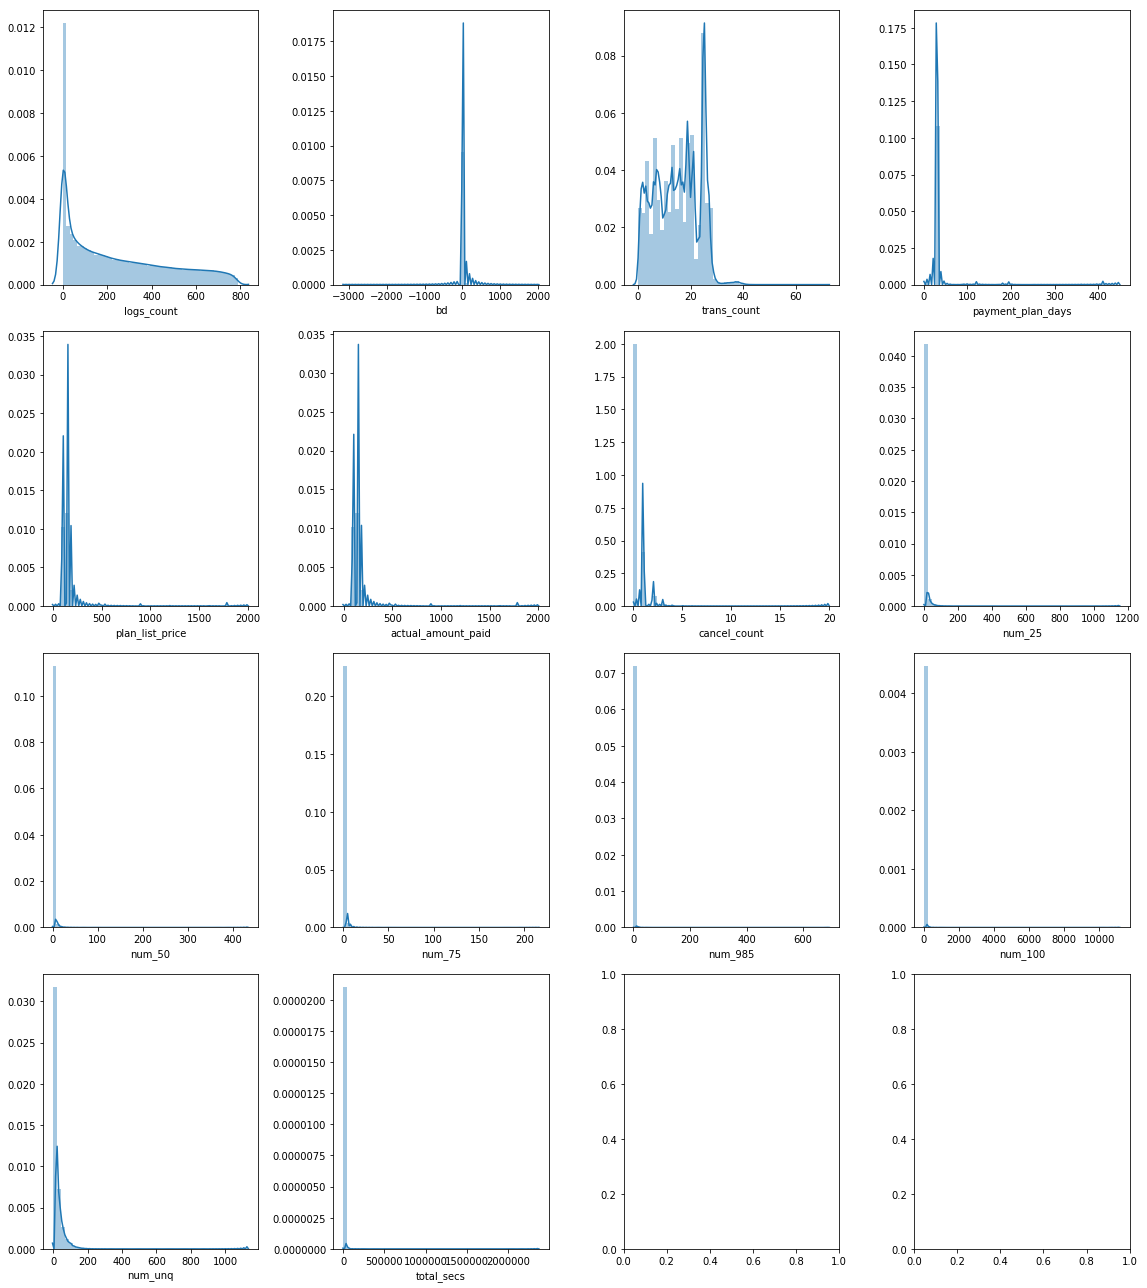

In [58]:
fig, axs = plt.subplots(4, 4, figsize = (16,18))
axslist=[ax for y in axs for ax in y]
for i in range(len(n_col)):
    sns.distplot(churn3[n_col[i]],ax=axslist[i])
fig.tight_layout()  

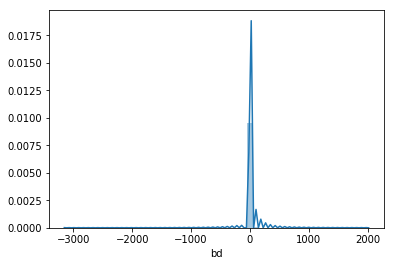

In [59]:
sns.distplot(churn3.bd)

### Inspect the histogram by chunks

In [60]:
a=churn3[(churn3.bd>14) & (churn3.bd<100)]

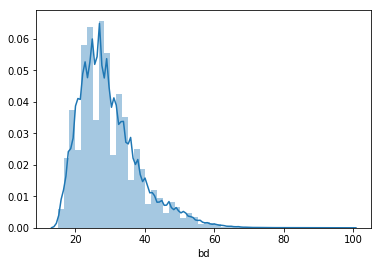

In [61]:
sns.distplot(a.bd)

In [62]:
b=churn3[(churn3.bd<=14) & (churn3.bd>0)]

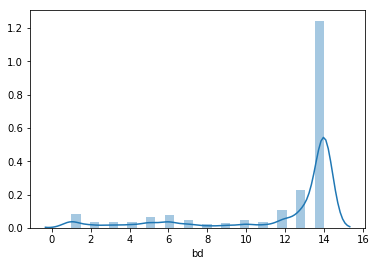

In [63]:
sns.distplot(b.bd)

In [64]:
c=churn3[(churn3.bd<0) & (churn3.bd>-500)]

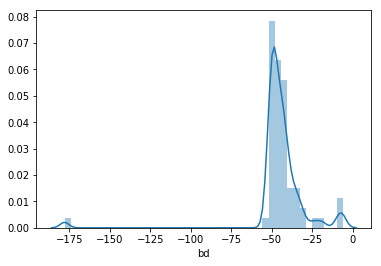

In [65]:
sns.distplot(c.bd)

### In-class exercise, use your own judgement to display several chunks of num_25

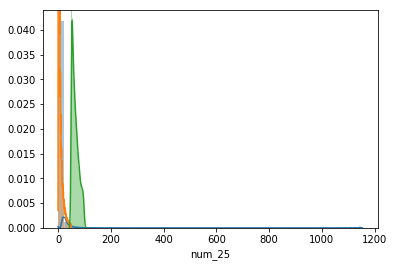

In [66]:
sns.distplot(churn3.num_25)
a=churn3[(churn3.num_25>0) & (churn3.num_25<50)]
sns.distplot(a.num_25)
b=churn3[(churn3.num_25>=50) & (churn3.num_25<100)]
sns.distplot(b.num_25)

### Findings:



### What actions can we take?

### Frequencies of categorical columns, countplot

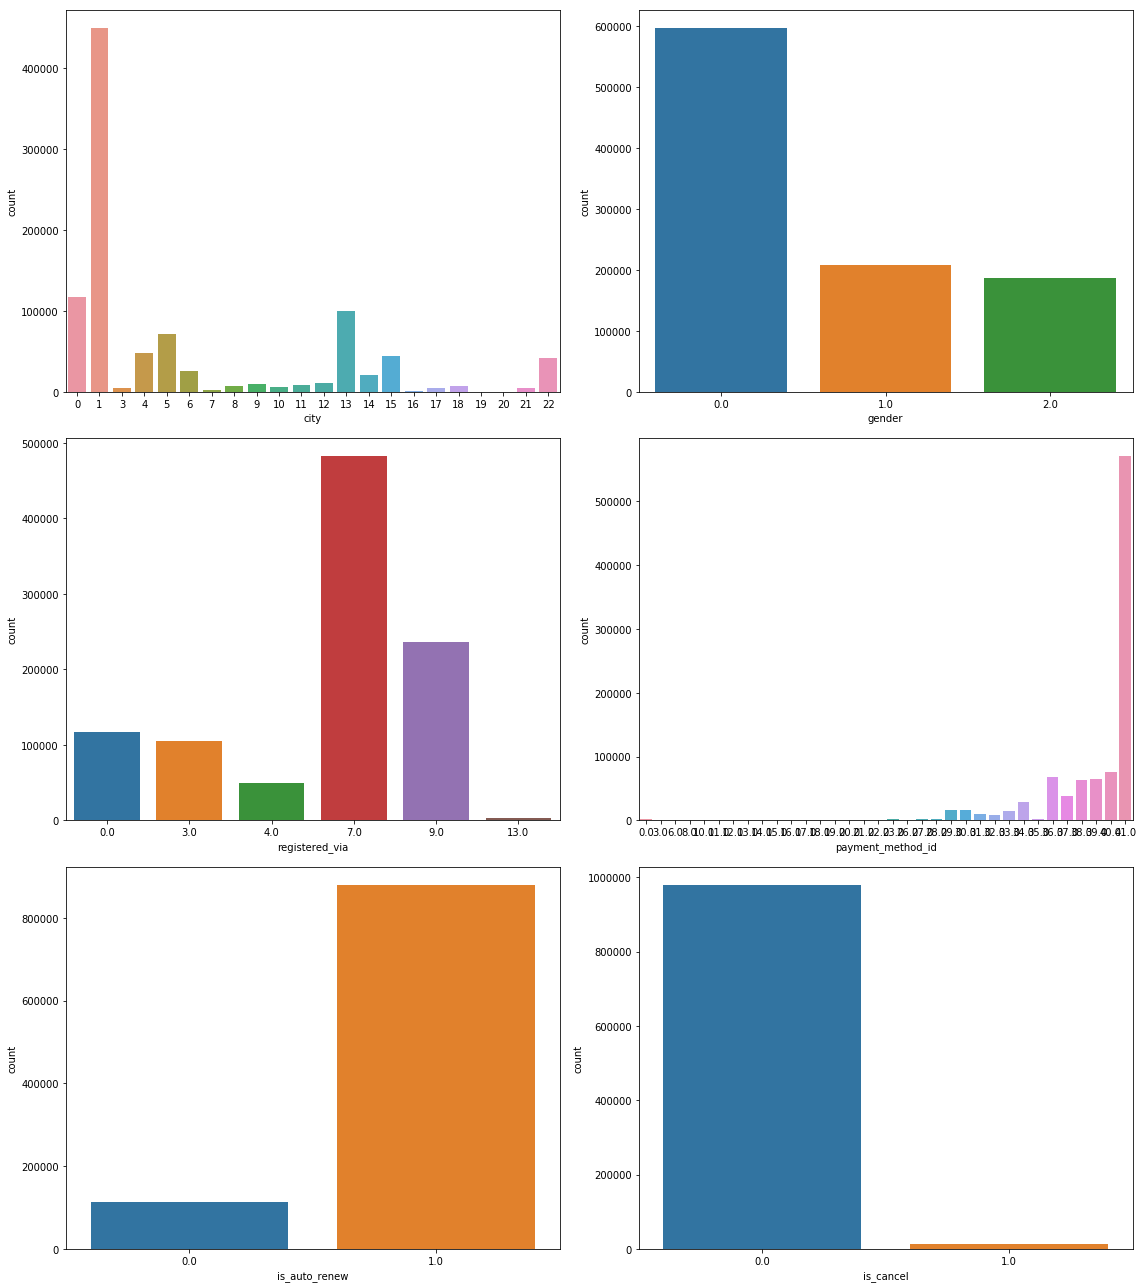

In [67]:
fig, axs = plt.subplots(3, 2, figsize = (16,18))
axslist=[ax for y in axs for ax in y]
for i in range(6):
    sns.countplot(churn3[c_col[i]],ax=axslist[i])
fig.tight_layout()    

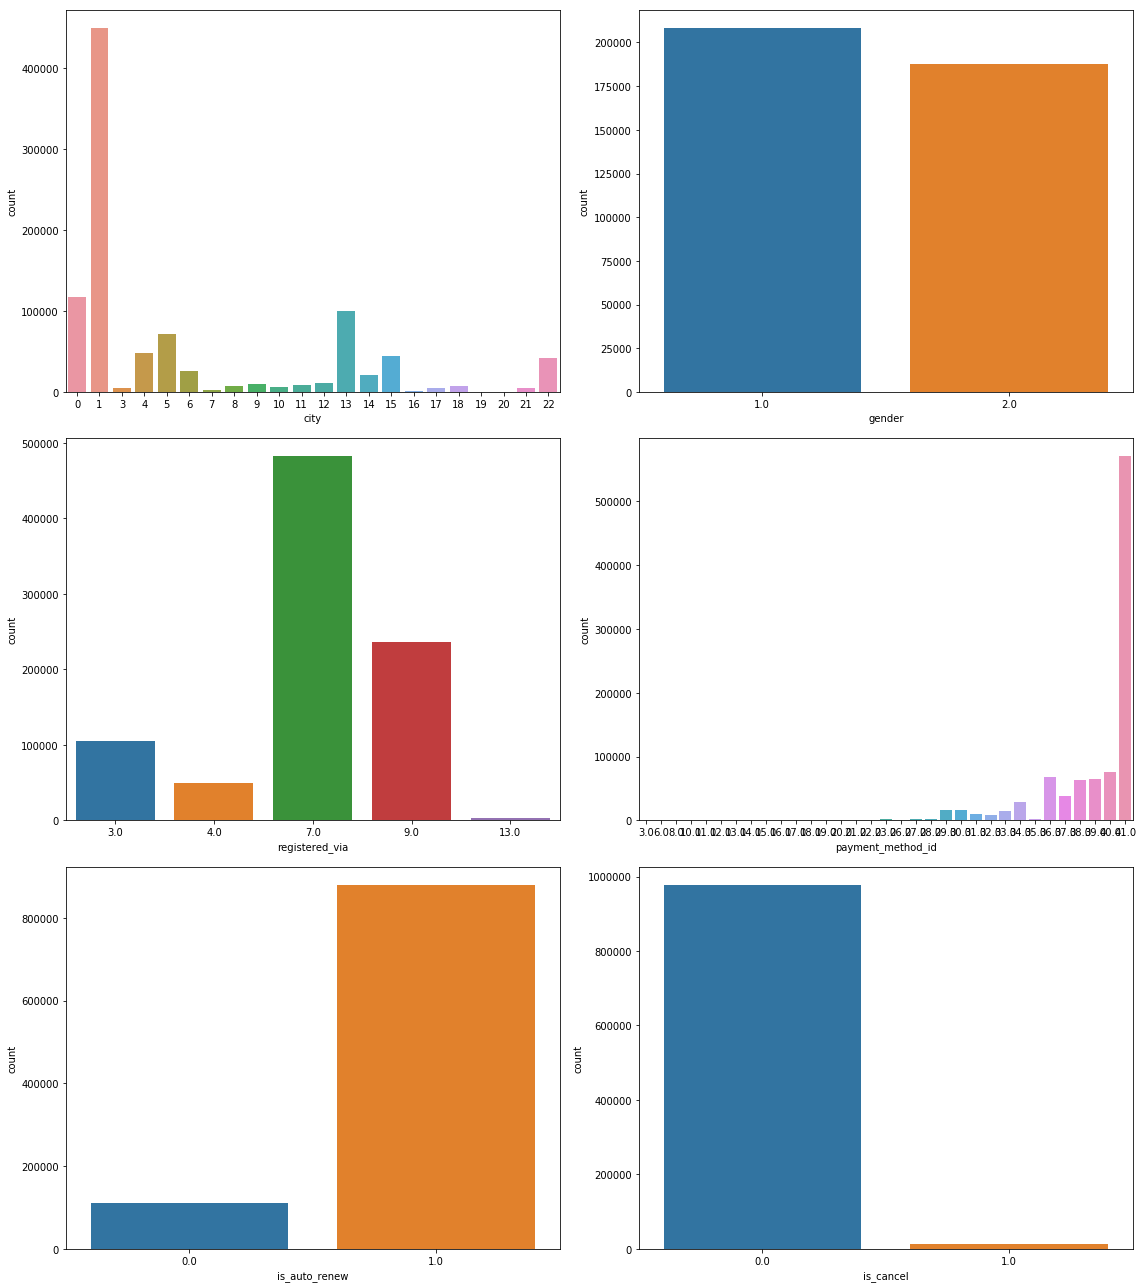

In [68]:
fig, axs = plt.subplots(3, 2, figsize = (16,18))
axslist=[ax for y in axs for ax in y]
for i in range(6):
    sns.countplot(churn[c_col[i]],ax=axslist[i])
fig.tight_layout() 

In [69]:
churn['registered_via'].value_counts()

7.0     481759
9.0     236583
3.0     105441
4.0      49282
13.0      3078
Name: registered_via, dtype: int64

### Boxplot, another way to visualize categorical columns, with median, and quartiles.

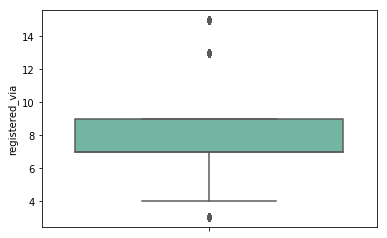

In [137]:
#churn['registered_via']=churn['registered_via'].apply(lambda x:x if x!=99 else 15)
churn['registered_via'].value_counts()
sns.boxplot(churn['registered_via'],orient='v',palette="Set2")

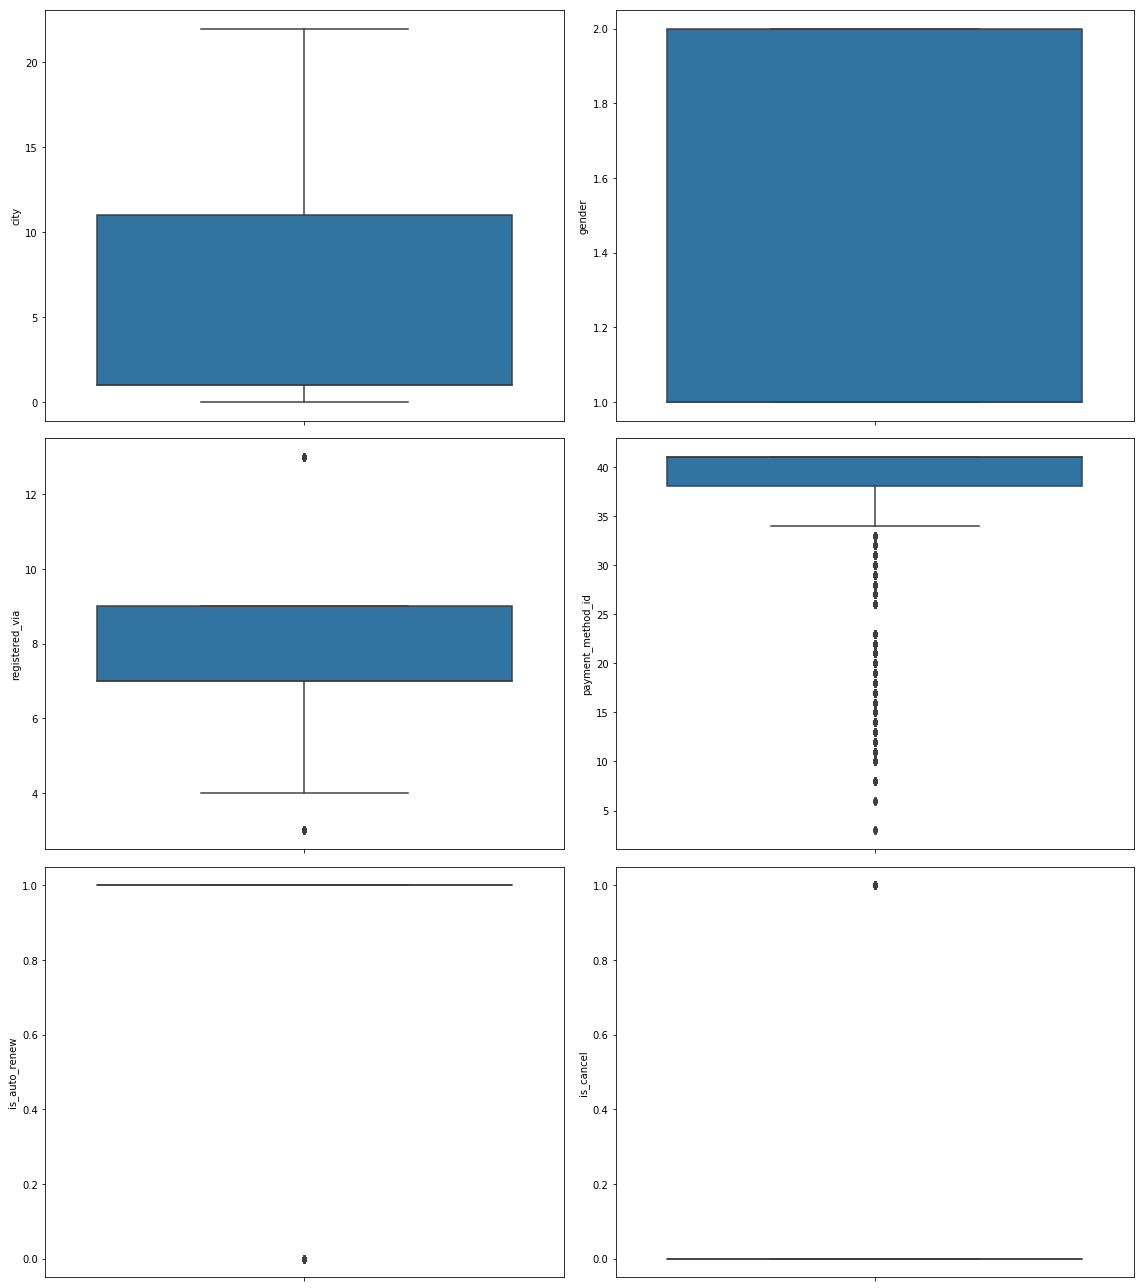

In [71]:
fig, axs = plt.subplots(3, 2, figsize = (16,18))
axslist=[ax for y in axs for ax in y]
for i in range(6):
    sns.boxplot(churn[c_col[i]],ax=axslist[i],orient='v',palette="Set2")
fig.tight_layout() 

### Violin plot, yet another way to visualize categorical columns.

It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

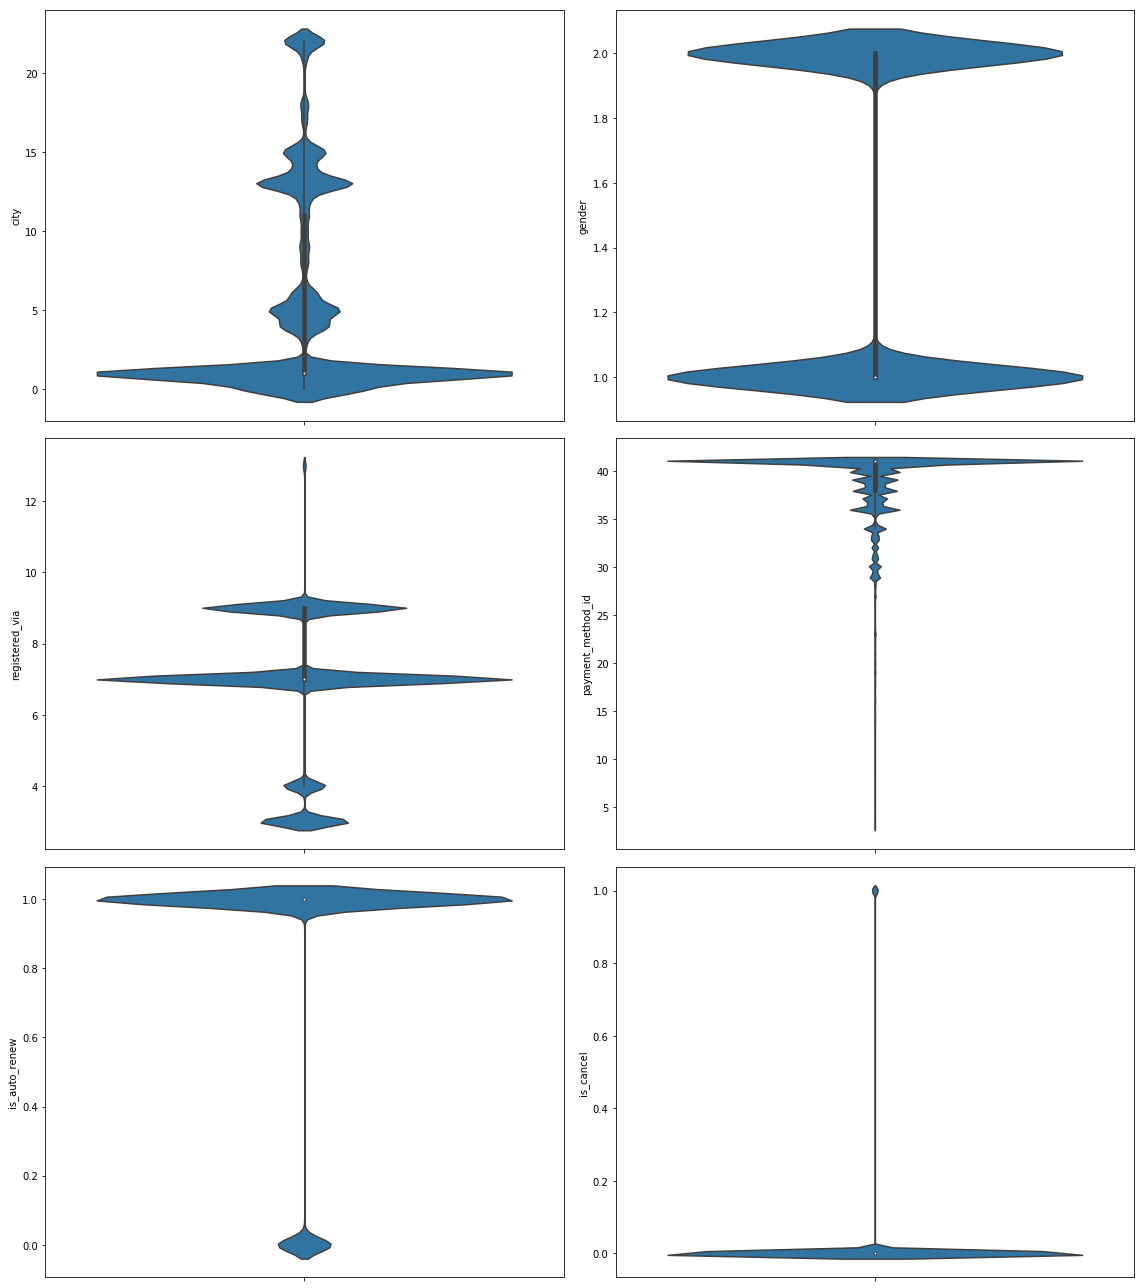

In [72]:
fig, axs = plt.subplots(3, 2, figsize = (16,18))
axslist=[ax for y in axs for ax in y]
for i in range(6):
    sns.violinplot(churn[c_col[i]],ax=axslist[i],orient='v')
fig.tight_layout() 

### Findings:

1. Most people registered are from city 1.
2. There is no city '2'.
3. More people choose not to disclose gender, gender of those who did disclose are balanced.
4. Most people registered via '7', and there are only '3,4,7,9,13' means of registration.
5. Most people paid with '41' method, the numbers are not continous.
6. Most people are auto renew.
7. Most people are not cancel. 

### What actions can we take? 

### Check the distribution of label (is_churn)

Use dataframe['label column name'].value_counts()

In [73]:
churn['is_churn'].value_counts()

0    929460
1     63471
Name: is_churn, dtype: int64

### Use countplot of seaborn

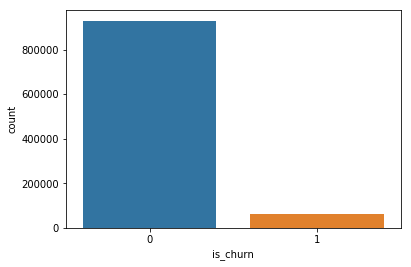

In [74]:
sns.countplot(churn.is_churn)

### Inspect the date columns

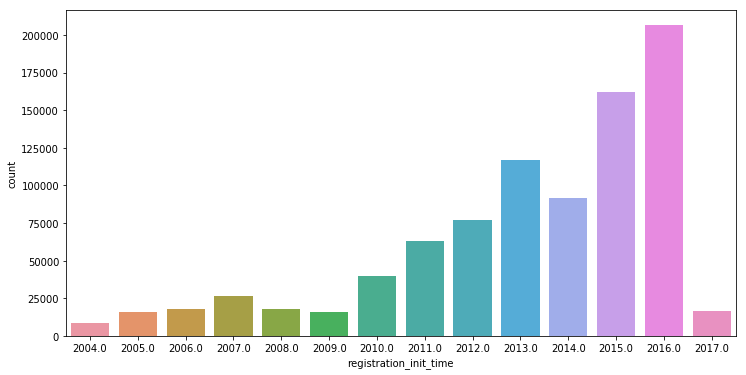

In [75]:
plt.figure(figsize=(12,6))
sns.countplot(churn.registration_init_time.dt.year)

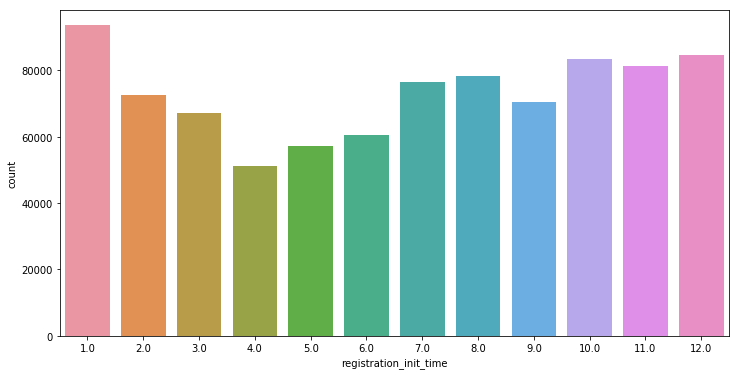

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(churn.registration_init_time.dt.month)

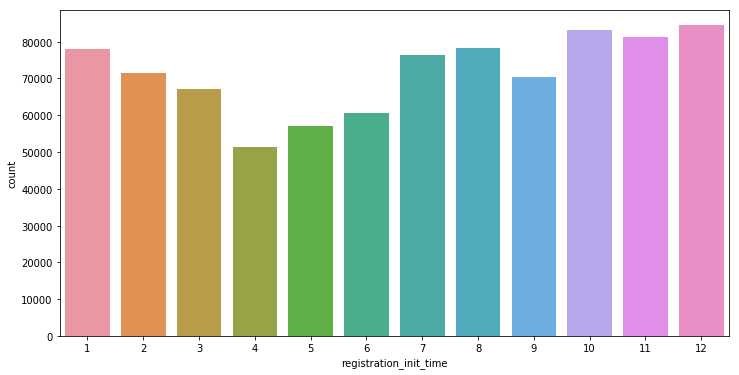

In [138]:
plt.figure(figsize=(12,6))
sns.countplot(churn.registration_init_time[churn.registration_init_time.dt.year<2017].dt.month)

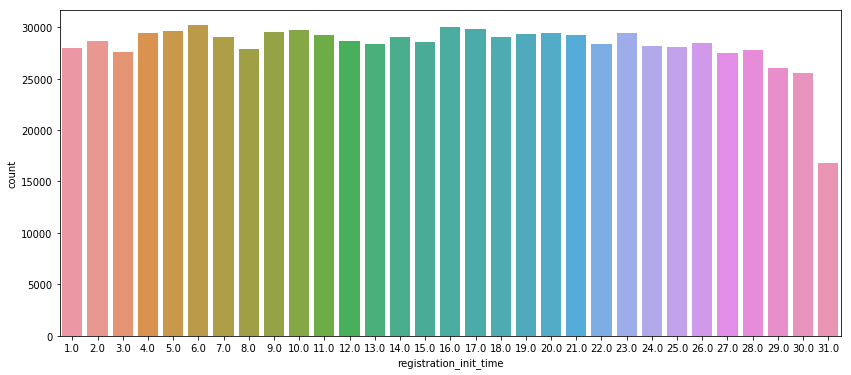

In [78]:
plt.figure(figsize=(14,6))
sns.countplot(churn.registration_init_time.dt.day)

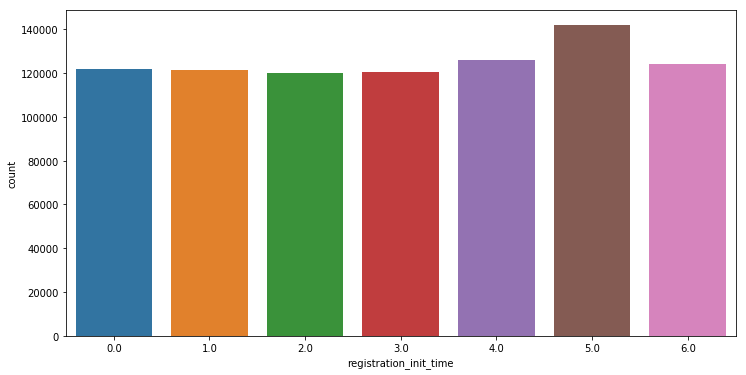

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(churn.registration_init_time.dt.weekday)

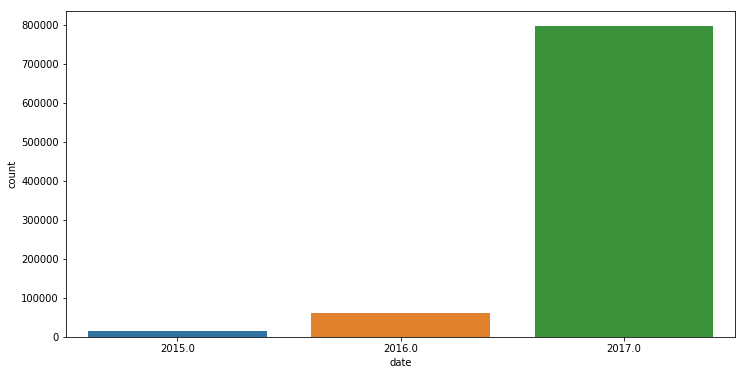

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(churn.date.dt.year)

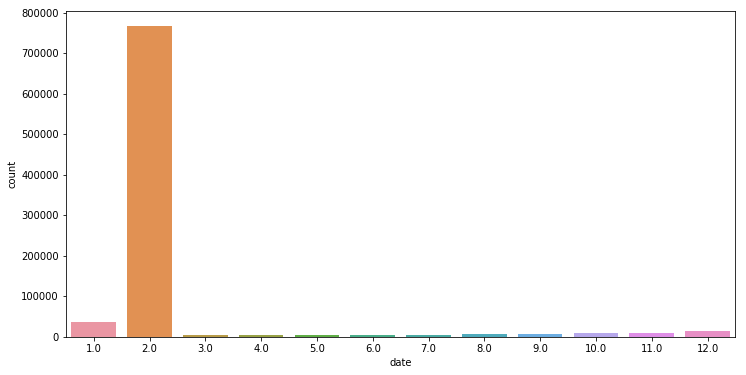

In [139]:
plt.figure(figsize=(12,6))
sns.countplot(churn.date.dt.month)

### Findings:

1. Initial registration was low from 2014-2009, and started to pick up in 2010, and 2015, 2016 saw most growth.
2. October and December saw most registration, and April and May experienced lowest registration.
3. Weekend (Saturday and Sunday) are most popular for registration, next is Friday.
4. Most subscribers' last logged activity was in 2017, meaning that most are active.
5. Most subscribers' last logged activity was in February, because that is how data were collected.


### What actions can we take?

## Bi_variate analysis

Explore the relationships between two variables, **espcially between target variable and predictors.**

### 'Is_churn' and categorical variables

In [ ]:
n_col=['logs_count',  'bd', 'trans_count',
       'payment_plan_days', 'plan_list_price',
       'actual_amount_paid',   'cancel_count',
        'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq',
       'total_secs']# numerical columns
c_col=['city','gender','registered_via','payment_method_id', 'is_auto_renew','is_cancel'] #categorical columns


### Use `pandas.crosstab` to generate the cross table for two categorical columns


is_churn,0,1,Ratio
gender,,,
1.0,189875,18325,0.088016
2.0,171705,16152,0.085980
Not disclosed,567880,28994,0.048576


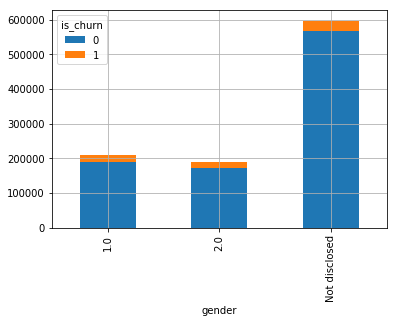

In [124]:
#Gender
churn['gender']=churn['gender'].fillna('Not disclosed') #fill missing with 'not disclosed'
gender_crosstab=pd.crosstab(churn['gender'],churn['is_churn'])# get cross table
gender_crosstab.plot(kind='bar', stacked=True, grid=True)# plot cross table 
gender_crosstab["Ratio"] =  gender_crosstab[1] / (gender_crosstab[0]+gender_crosstab[1] )#calculate the churn ratio
gender_crosstab

#### With stacked bar chart, it may not be easy to see the churn differneces between female and male or not disclosed.

Instead, we can just plot the churn ratio among different categories.

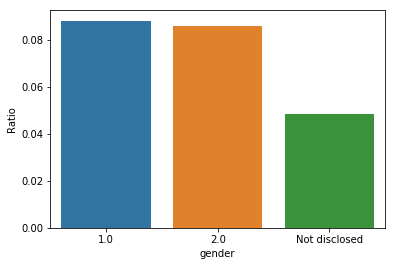

In [125]:
sns.barplot(gender_crosstab.index,gender_crosstab.Ratio)

### What we can infer is that gender (female or male) may not distinguish churn from non-churn, while 'Not disclosed' may do a little better job, meaning that, subscribers who did not disclose their gender may be less likely to churn than those who disclosed their gender. 

### Plot churn ratio for all categorical columns 

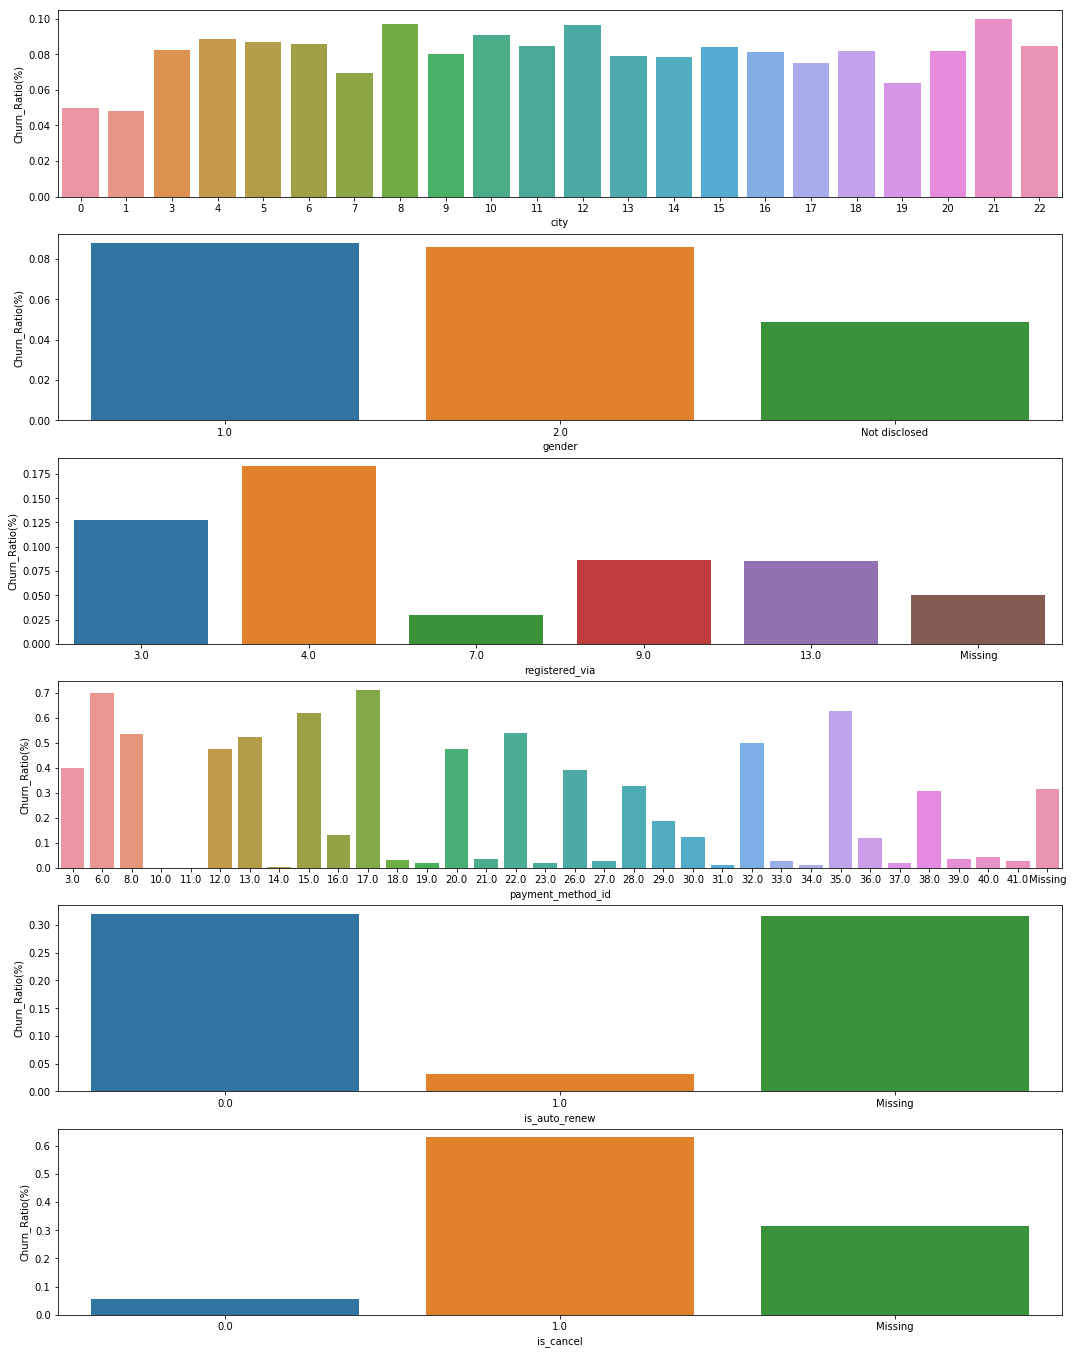

In [126]:
fig,axes=plt.subplots(6,1,figsize =(18,24))
#axslist=[ax for y in axes for ax in y]
for i in range(6):    
    churn[c_col[i]]=churn[c_col[i]].fillna('Missing')#using 'missing' as a new value for missing values
    c_crosstab=pd.crosstab(churn[c_col[i]],churn['is_churn'])
    c_crosstab["Churn_Ratio(%)"] =  c_crosstab[1] / (c_crosstab[0]+c_crosstab[1])
    sns.barplot(c_crosstab.index,c_crosstab["Churn_Ratio(%)"],ax=axes[i])

### Findings:

1. Although city 1 has most registered subscribers, it has lower churn ratio, while subscribers from city 8,12,21 are more likely to churn.
2. Gender (female or male) may not distinguish churn from non-churn, while 'Not disclosed' may do a little better job, meaning that, subscribers who did not disclose their gender may be less likely to churn than those who disclosed their gender. 
3. Subscribers registered via 3 and 4, are more likely to churn.
4. Payment methods have a big variance in churn ratio.
5. Subscribers who auto renew are much less likely to churn.
6. Subscribers who canceled the service are much more likely to churn.
7. Missing value category churn ratio seems to be different from other values for most columns.

### What actions can we take?

## Relationship between 'is_churn' and continous variables

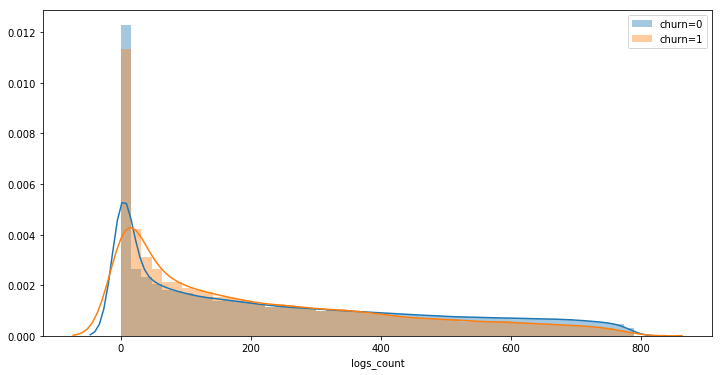

In [161]:
plt.figure(figsize=(12,6))
sns.distplot(churn3[churn3.is_churn==0].logs_count,label='churn=0')
sns.distplot(churn3[churn3.is_churn==1].logs_count,label='churn=1')
plt.legend()

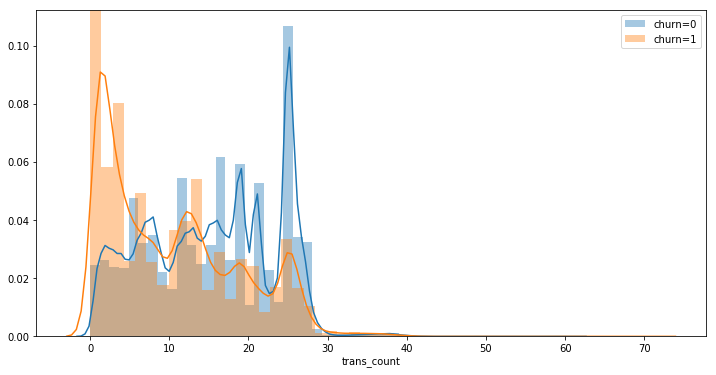

In [160]:
plt.figure(figsize=(12,6))
sns.distplot(churn3[churn3.is_churn==0].trans_count,label='churn=0')
sns.distplot(churn3[churn3.is_churn==1].trans_count,label='churn=1')
plt.legend()

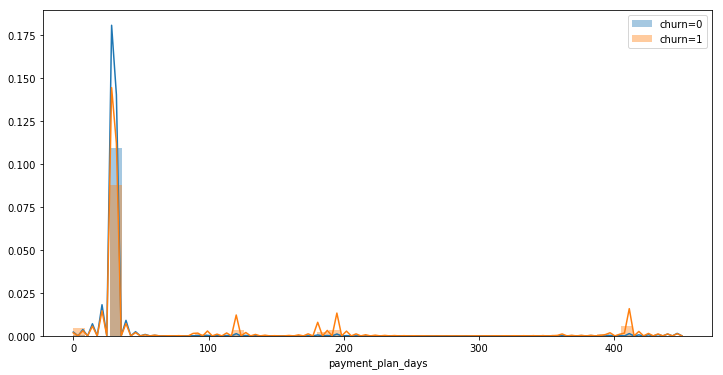

In [162]:
plt.figure(figsize=(12,6))
sns.distplot(churn3[churn3.is_churn==0].payment_plan_days,label='churn=0')
sns.distplot(churn3[churn3.is_churn==1].payment_plan_days,label='churn=1')
plt.legend()

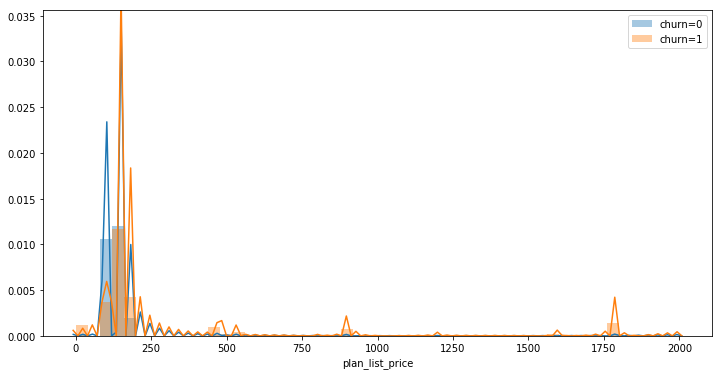

In [163]:
plt.figure(figsize=(12,6))
sns.distplot(churn3[churn3.is_churn==0].plan_list_price,label='churn=0')
sns.distplot(churn3[churn3.is_churn==1].plan_list_price,label='churn=1')
plt.legend()

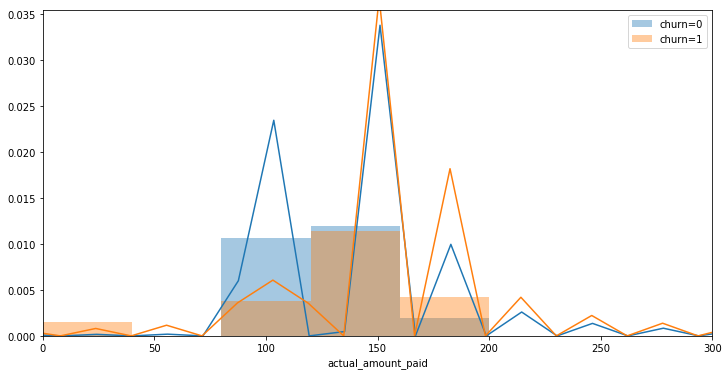

In [169]:
plt.figure(figsize=(12,6))
sns.distplot(churn3[churn3.is_churn==0].actual_amount_paid,label='churn=0')
sns.distplot(churn3[churn3.is_churn==1].actual_amount_paid,label='churn=1')
plt.xlim(0,300)# set the range of x axis
plt.legend()

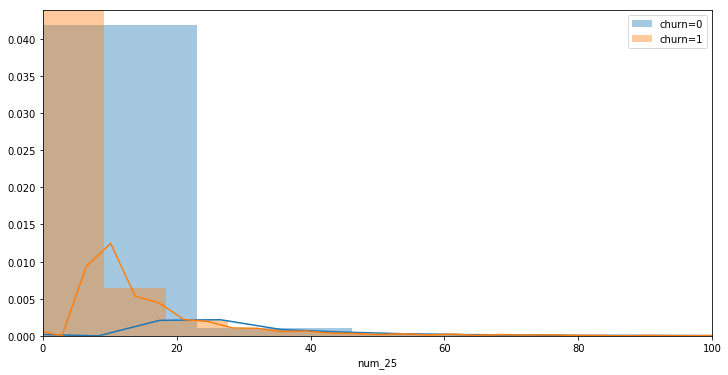

In [168]:
plt.figure(figsize=(12,6))
sns.distplot(churn3[churn3.is_churn==0].num_25,label='churn=0')
sns.distplot(churn3[churn3.is_churn==1].num_25,label='churn=1')
plt.xlim(0,100)
plt.legend()

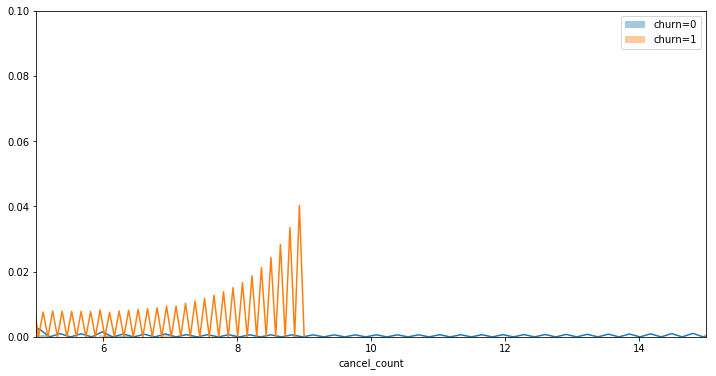

In [172]:
plt.figure(figsize=(12,6))
sns.distplot(churn3[churn3.is_churn==0].cancel_count,label='churn=0')
sns.distplot(churn3[churn3.is_churn==1].cancel_count,label='churn=1')
plt.xlim(5,15)
plt.ylim(0,0.1)
plt.legend()

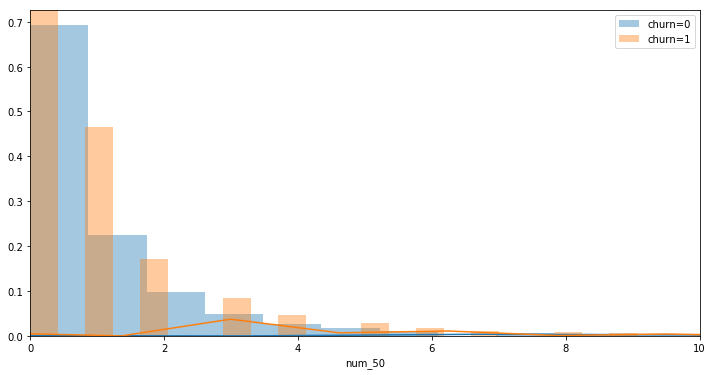

In [180]:
plt.figure(figsize=(12,6))
sns.distplot(churn3[churn3.is_churn==0].num_50,label='churn=0',bins =500)#set how many bins in the histogram
sns.distplot(churn3[churn3.is_churn==1].num_50,label='churn=1',bins=500)
plt.xlim(0,10)
#plt.ylim(0,0.1)
plt.legend()

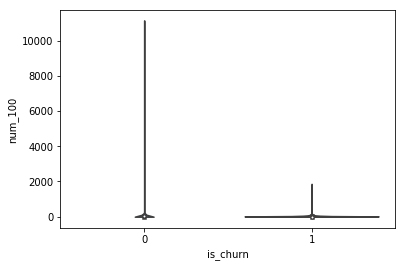

In [202]:
sns.violinplot(y=churn.num_100,x=churn.is_churn, orient='v')


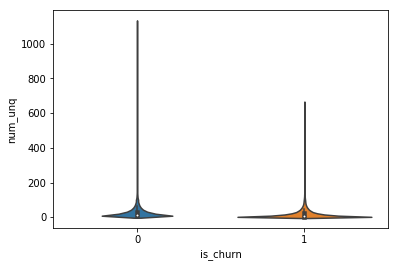

In [203]:
sns.violinplot(y=churn.num_unq,x=churn.is_churn, orient='v')

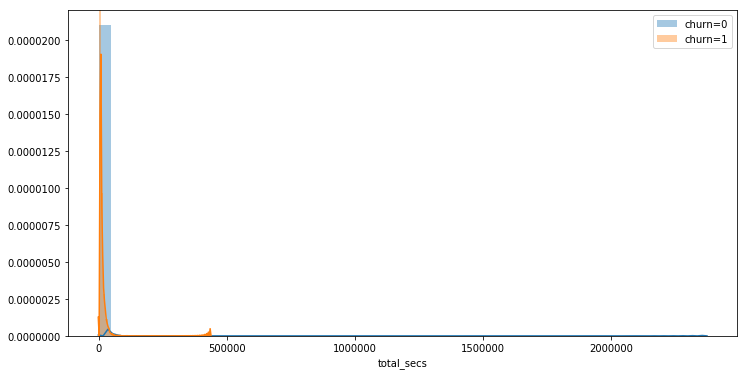

In [206]:
plt.figure(figsize=(12,6))
sns.distplot(churn3[churn3.is_churn==0].total_secs,label='churn=0')
sns.distplot(churn3[churn3.is_churn==1].total_secs,label='churn=1')
plt.legend()

### What can we find?

### Heatmap of the correlations among variables

You can use the following code to create the heatmap, and you need seaborn library, if you have not intalled the library, you can go to command line to

pip install seaborn

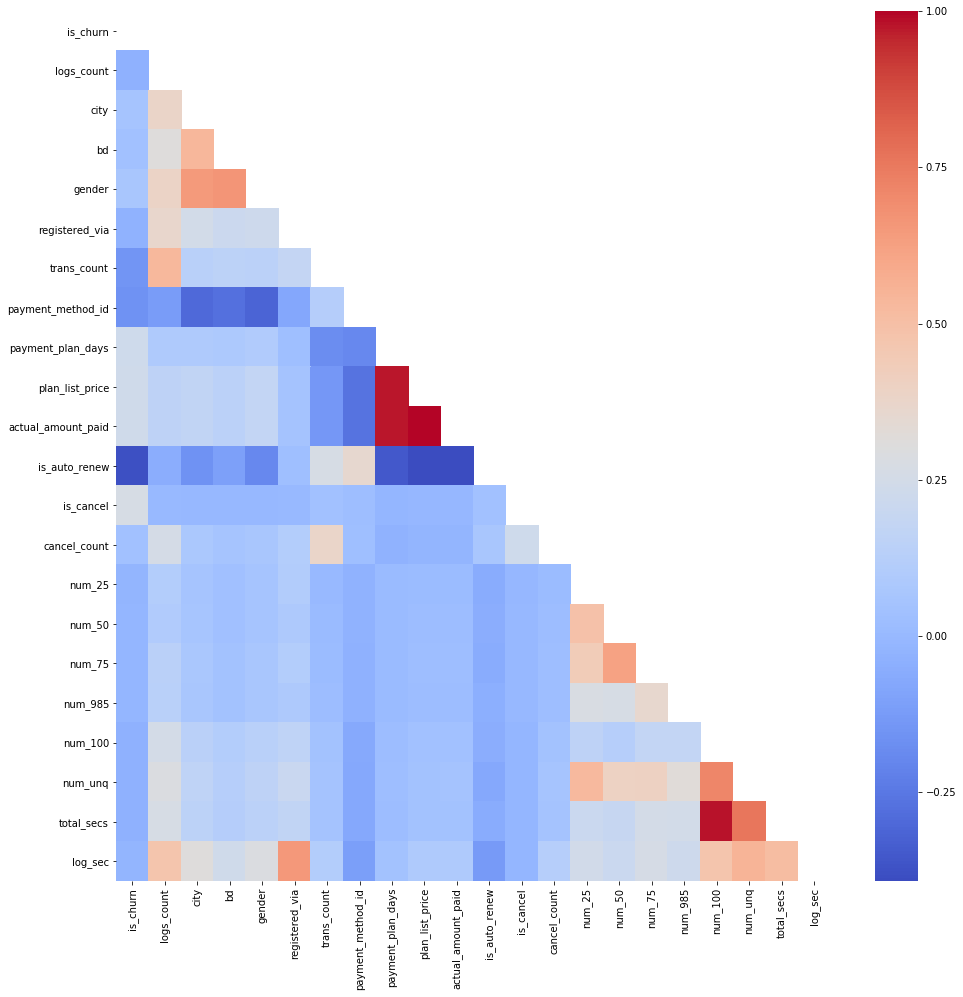

In [234]:
# Calculate correlations of numberical columns in the dataframe
corr = churn3.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(corr)] = True
#corr=np.triu(corr,k=1) 
# Heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr,cmap = "coolwarm",mask=mask)
